<a href="https://colab.research.google.com/github/smnizza/machine-learning-guide/blob/main/USL_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering – Pengelompokan Data ke dalam k-Cluster

K-Means Clustering adalah algoritma **unsupervised learning** yang digunakan untuk **mengelompokkan data** ke dalam **k kelompok** berdasarkan kesamaan fitur.

## Cara Kerja K-Means
1. Pilih jumlah cluster **k**.
2. Inisialisasi pusat cluster (**centroids**) secara acak.
3. **Tentukan jarak** setiap titik data ke centroid terdekat dan tetapkan ke cluster tersebut.
4. **Hitung ulang centroid** berdasarkan rata-rata titik dalam setiap cluster.
5. **Ulangi langkah 3 dan 4** hingga centroid stabil atau jumlah iterasi maksimum tercapai.

## Kelebihan dan Kekurangan K-Means
✅ **Kelebihan**:
- Mudah diimplementasikan dan cepat.
- Efektif untuk dataset besar.
- Hasil mudah diinterpretasikan.

❌ **Kekurangan**:
- Harus menentukan jumlah cluster **k** terlebih dahulu.
- Sensitif terhadap inisialisasi awal centroid.
- Tidak bekerja dengan baik jika cluster memiliki bentuk non-spherical.

## Implementasi K-Means Clustering
Kita akan menggunakan dataset **Iris** untuk melakukan clustering berdasarkan fitur bunga.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset Iris
iris = load_iris()
X = iris.data

# Normalisasi data agar memiliki skala yang sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Buat model K-Means dengan 3 cluster (sesuai jumlah spesies dalam dataset)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Tambahkan hasil clustering ke dalam DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df["Cluster"] = y_kmeans

# Tampilkan jumlah data dalam setiap cluster
df["Cluster"].value_counts()

,count
Cluster,
0,53
1,50
2,47


## Menentukan Jumlah Cluster Optimal dengan Metode Elbow
Metode **Elbow** digunakan untuk menemukan jumlah cluster terbaik dengan melihat titik di mana grafik **distorsi** mulai melandai.

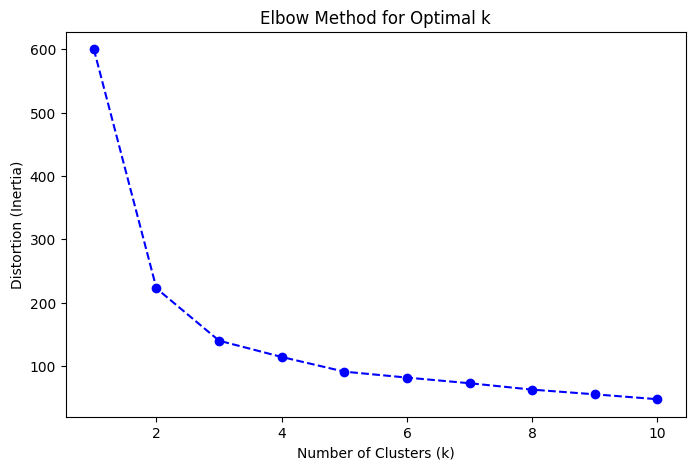

In [2]:
distortions = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plot hasil
plt.figure(figsize=(8, 5))
plt.plot(k_range, distortions, marker='o', linestyle='dashed', color='blue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

## Visualisasi Hasil Clustering dengan PCA
Karena dataset memiliki 4 fitur, kita akan menggunakan **Principal Component Analysis (PCA)** untuk mereduksi dimensi ke 2D.

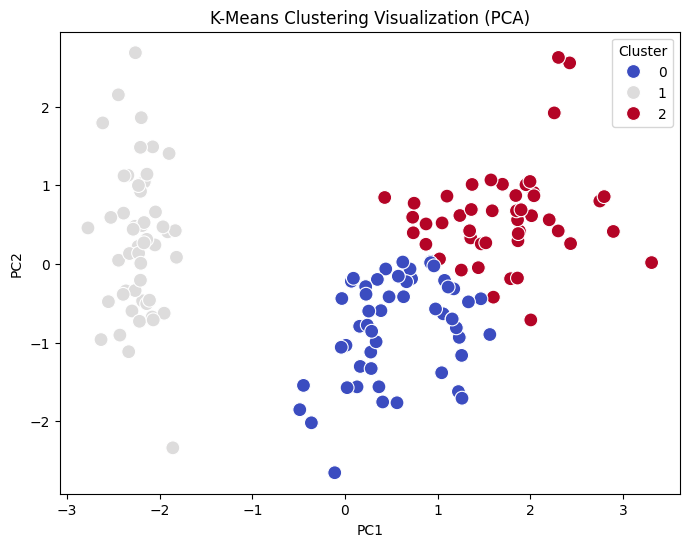

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = y_kmeans

# Plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster"], palette="coolwarm", s=100)
plt.title("K-Means Clustering Visualization (PCA)")
plt.show()

## Kesimpulan
- K-Means Clustering mengelompokkan data ke dalam **k cluster** berdasarkan kesamaan fitur.
- Pemilihan jumlah cluster **k** sangat penting untuk hasil yang optimal.
- **Metode Elbow** membantu menentukan jumlah cluster yang ideal.

### **Kapan Menggunakan K-Means?**
- Jika data memiliki **struktur cluster yang jelas**.
- Jika jumlah cluster **dapat ditentukan sebelumnya**.
- Jika ingin melakukan **segmentasi pelanggan, deteksi pola, atau kompresi data**.

### **Pengembangan Lebih Lanjut**
- **Menguji metode lain** seperti DBSCAN atau Hierarchical Clustering.
- **Mengeksplorasi metrik jarak lain**, seperti Cosine Similarity.
- **Menggunakan K-Means untuk segmentasi pelanggan dalam data bisnis**.